<a href="https://colab.research.google.com/github/Abhihek12/Grip-2022/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - GRIP - Data Science and Business Analytics**

**Author:** **ABHISHEK SINGH**

February 2022

**TASK 1 :** Prediction using Supervised Machine Learning
Predicting the percentage of an student based on the no. of study hours.

Importing the required libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data from Url**

In [ ]:
student_score = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
student_score.head() 
# To view first five rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploring the data**

In [ ]:
student_score.shape
# shape of data

(25, 2)

In [ ]:
student_score.info()
# dataframes basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
student_score.isnull().sum()
# checking for presence of null values

Hours     0
Scores    0
dtype: int64

In [ ]:
student_score.corr()
# the correlation between number of hours studied and respective scores

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Statistical Values**

In [ ]:
student_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**Plotting the Data**
**Visual Representation through Histogram **

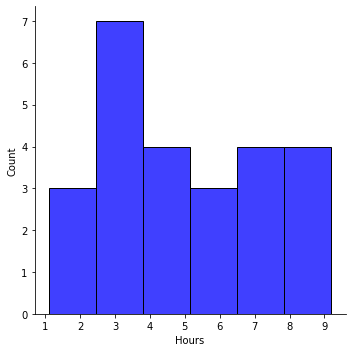

In [ ]:
sns.displot(student_score['Hours'],label='hour',color='blue')

**Plotting the Score Distribution in Data**

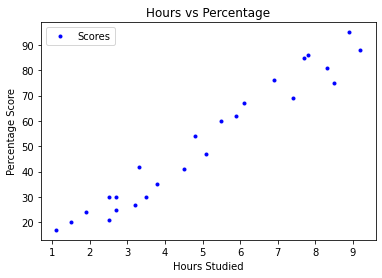

In [ ]:
student_score.plot(x='Hours', y='Scores', style='.', color= 'blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Dividing Data into Attributes/Inputs And Labels/Outputs**

In [ ]:
x = student_score.iloc[:, :-1].values  
y = student_score.iloc[:, 1].values  
y.shape, x.shape

((25,), (25, 1))

**Splitting Data into Training and Testing sets**

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state=0)
# use Scikit-Learn's built-in train_test_split() method

**Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression()

**Regression Line Plot**

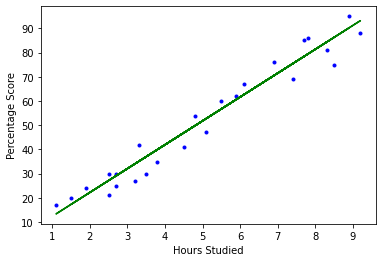

In [ ]:
line = reg.coef_ * x + reg.intercept_

# Plotting for the test data
plt.scatter(x, y, color='blue', marker='.')
plt.plot(x, line, color= 'green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

**Making Predictions and Comparing actual and predicted values**

In [ ]:
y_pred=reg.predict(x_test) # predicted testset values
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


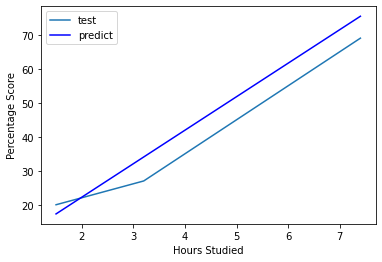

In [ ]:
plt.plot(x_test,y_test,label="test")
plt.plot(x_test,y_pred,color="blue",label="predict")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
leg=plt.legend()
plt.show()

In [ ]:
hours = [[2],[5.4],[8],[9]]
own_pred = reg.predict(hours)
print("No of Hours studied = {}".format(hours))
print("Predicted Score  = {}".format(own_pred))

No of Hours studied = [[2], [5.4], [8], [9]]
Predicted Score  = [22.22958753 55.73575592 81.35811999 91.2128754 ]


**What will be predicted score if a student studies for 9.5 hrs/day?**

In [ ]:
Percentage_Score = reg.predict(np.array([[9.5]]))
print('Number of Hours studied : 9.5 hrs/day')
print(f'Percentage Score : {Percentage_Score}')

Number of Hours studied : 9.5 hrs/day
Percentage Score : [96.1402531]


**Evaluating the Model**
**For evaluating performance of our algorithm, to compare how well different** **algorithms perform on a particular dataseT**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.3994503136120064


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 32.865569647342106


## **Summarizing, The Dataset of hours students study and precentage score,** **contains 2 Columns and 25 Rows, with Correlation between scores and hours being** **0.9761, implying a Positive Linear Realtionship**
# **Solution to the problem statement of predicting score of a student who studies for 9.5 hrs/day, using Simple Linear Regression model is a predicted perecentage of 96.140.**